<a href="https://colab.research.google.com/github/AjaharDaroga/EDA_CAPSTONE_PROJECT/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROBLEM STATEMENT:-**

<b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

<b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

<b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [10]:
# important libraries
import pandas as pd
import numpy as np
import seaborn as sn              #visualization library
import matplotlib.pyplot as plt   #visualization library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [11]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
#load the dataset
df=pd.read_csv('/content/drive/MyDrive/CAPSTONE_PROJECTS/EDA_PROJECT_HOTEL_BOOKING_ANALYSIS/Hotel_Bookings.csv')

In [13]:
# view the data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [14]:
# shape of dataset (i.e row & col)
df.shape

(119390, 32)

In [15]:
# info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [16]:
# missing data
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [17]:
# droping feature/col which is more then 15% of data is missing
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
company,112593,0.943069
agent,16340,0.136862
country,488,0.004087
children,4,0.000034
reserved_room_type,0,0.000000
assigned_room_type,0,0.000000
booking_changes,0,0.000000
deposit_type,0,0.000000
hotel,0,0.000000
previous_cancellations,0,0.000000


In [18]:
df= df.drop(['company'], axis=1)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [19]:
# after remove company feature from dataset
df.shape

(119390, 31)

In [20]:
# filling the null values or mising values in dataset
df["children"] = df["children"].fillna('mode')
df["country"] = df["country"].fillna('mode')
df["agent"] = df["agent"].fillna('mean')

In [21]:
#missing values
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [22]:
# discriptive analysis
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


**UNDERSTANDING THE FEATURE OF GIVEN DATASET**

In [23]:
def feature_understand_plot(x):
  ''' plot the categorical data presenation in bar plot to easely understable and different subtype in data'''
  plt.figure(figsize=(10,7))
  return sn.countplot(data=df,x=x)

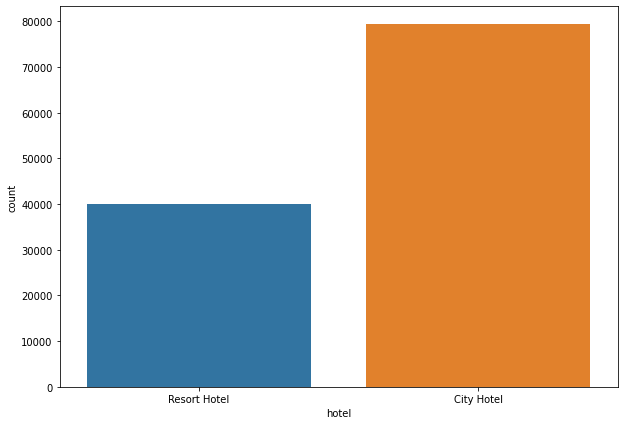

In [24]:
# hotel booking propotion in resort hotel & city hotel
#df['hotel'].unique()
feature_understand_plot('hotel')

In [25]:
# exact count of passenger book the hotel
resort_hotel = (df['hotel'] == 'Resort Hotel').sum()
city_hotel= (df['hotel'] == 'City Hotel').sum()
print("Total of Resort Hotel: {} passengers\n".format(resort_hotel))
print("Total of City Hotel: {} passengers\n".format(city_hotel))

Total of Resort Hotel: 40060 passengers

Total of City Hotel: 79330 passengers



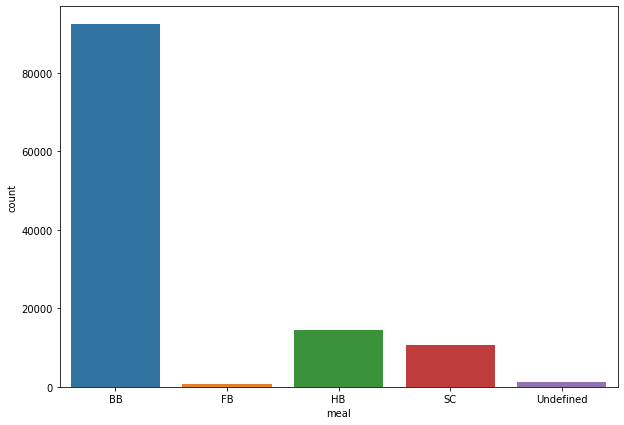

In [26]:
# booking propotion based on meal
#df['meal'].unique()
feature_understand_plot('meal')


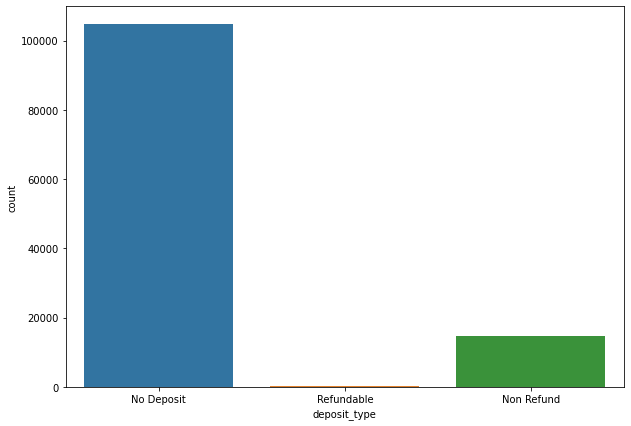

In [27]:
# based on deposit type
#df['deposit_type'].unique()
feature_understand_plot('deposit_type')


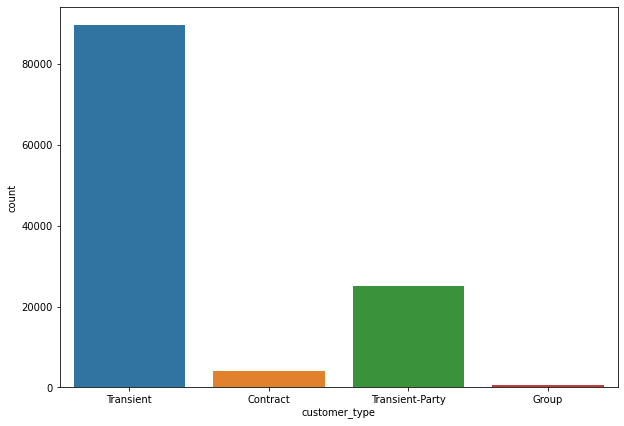

In [28]:
# based on customer type
#df['customer_type'].unique()
feature_understand_plot('customer_type')

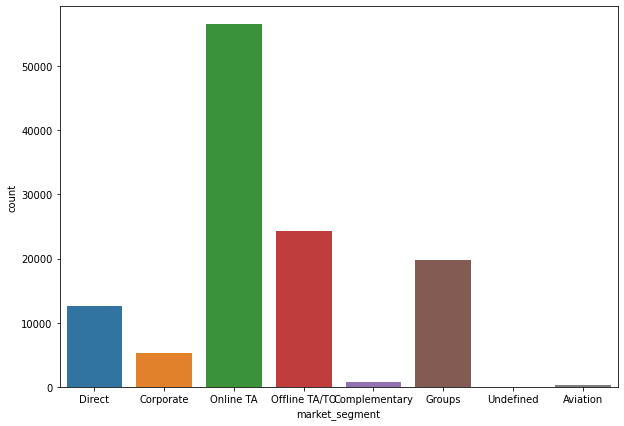

In [29]:
# besed on market segment
#df['market_segment'].unique()
feature_understand_plot('market_segment')

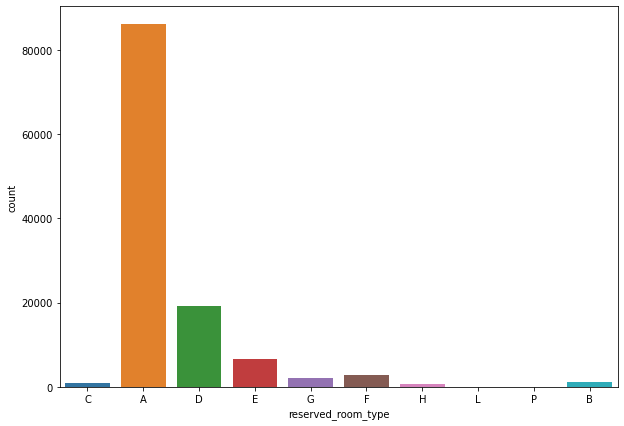

In [30]:
# based on reserved room type
#df['reserved_room_type'].unique()
feature_understand_plot('reserved_room_type')


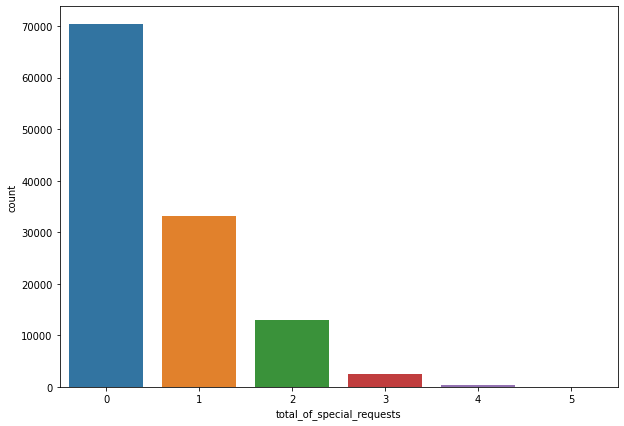

In [31]:
# based on special request
#df['total_of_special_requests'].unique()
feature_understand_plot('total_of_special_requests')

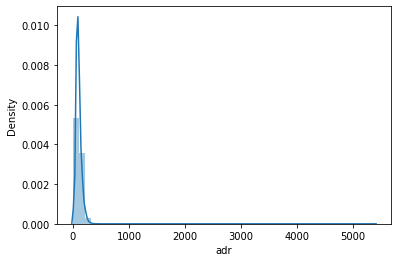

In [32]:
# Distribution of ADR
sn.distplot(df['adr'])

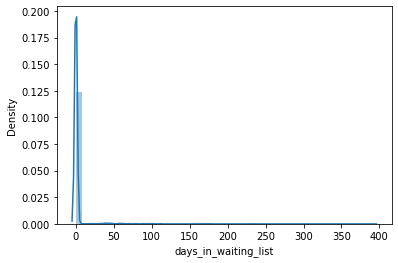

In [33]:
# Distribution of days waiting list
sn.distplot(df['days_in_waiting_list'])

[Text(0.5, 1.0, 'Total Passengers of both hotels canceled booking propotion')]

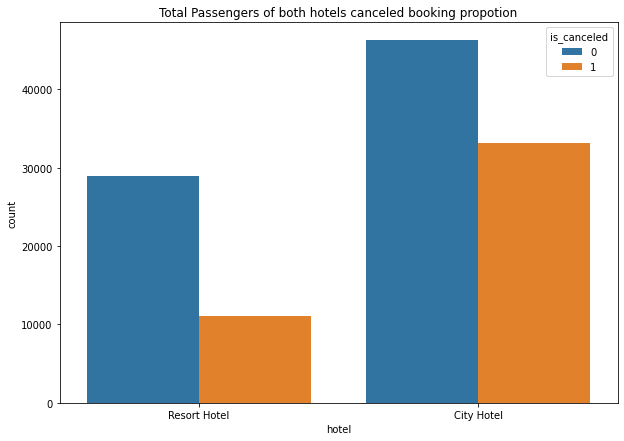

In [34]:
# hotels propotion in resort hotel & city hotel basis on canceled booking(0=not cancel, 1= cancel)
plt.figure(figsize=(10,7))
canceled_booking=sn.countplot(data=df,x='hotel',hue='is_canceled')
canceled_booking.set(title = "Total Passengers of both hotels canceled booking propotion")

**# More passengers made cancellations at city hotels.**

[Text(0.5, 1.0, 'Total Passengers of both hotels per year')]

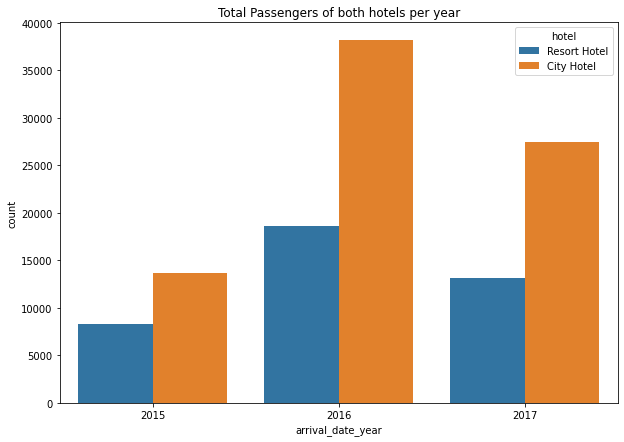

In [35]:
# year wise hotel booking 
plt.figure(figsize=(10,7))
per_year = sn.countplot(df['arrival_date_year'], hue = 'hotel', data = df);
per_year.set(title = "Total Passengers of both hotels per year")

[Text(0.5, 1.0, 'Total Passengers booking of both hotels per month')]

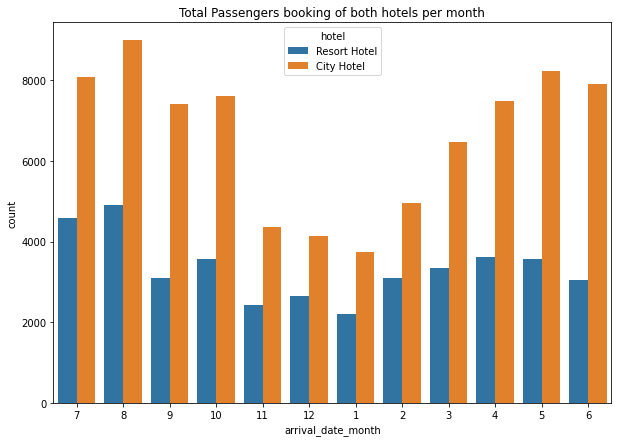

In [36]:
#monthwise hotel booking  for fisrt 12 month
df['arrival_date_month'].replace({'January' : '1','February' : '2','March' : '3','April' : '4','May' : '5','June' : '6','July' : '7','August' : '8','September' : '9', 'October' : '10','November' : '11','December' : '12'}, inplace=True)
plt.figure(figsize=(10,7))
monthwise = sn.countplot(df['arrival_date_month'], hue = 'hotel', data = df);
monthwise.set(title = "Total Passengers booking of both hotels per month")

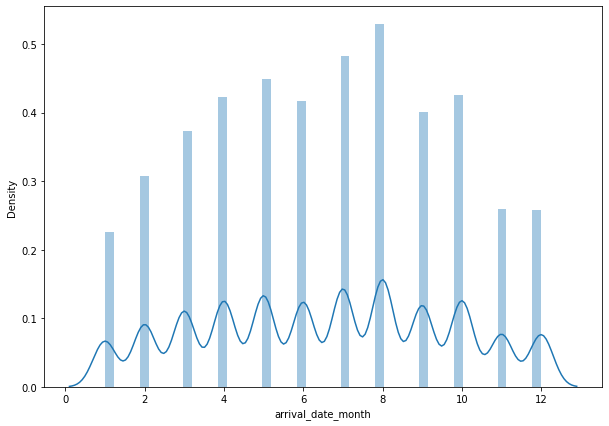

In [37]:
# distribution plot for monthwise booking
plt.figure(figsize=(10,7))
sn.distplot(df['arrival_date_month'])

[Text(0.5, 1.0, 'Total Passengers booking of both hotels based on week')]

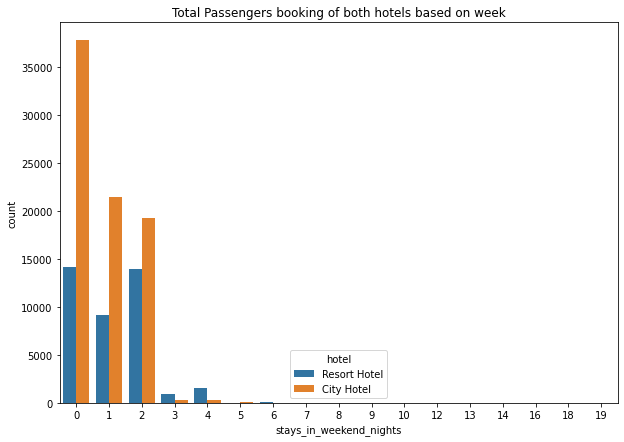

In [38]:
# optimum length stay in hotel on weekend
plt.figure(figsize=(10,7))
weekend=sn.countplot(df['stays_in_weekend_nights'],hue='hotel',data=df)
weekend.set(title = "Total Passengers booking of both hotels based on week")

In [39]:
df['stays_in_weekend_nights'].value_counts(sort=True)

0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

[Text(0.5, 1.0, 'Total Passengers booking of both hotels based on week')]

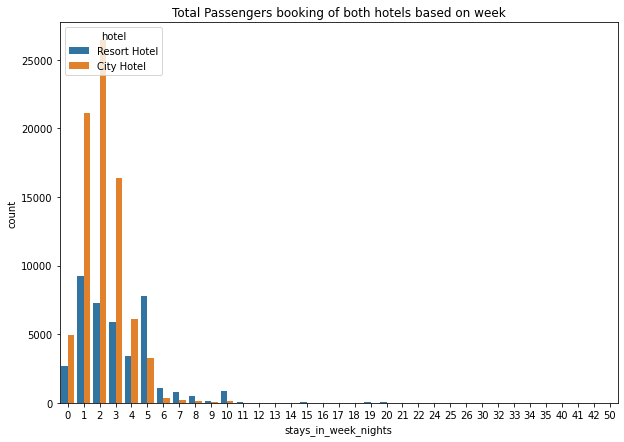

In [40]:
# optimum length stay in hotel on week
plt.figure(figsize=(10,7))
week=sn.countplot(df['stays_in_week_nights'],hue='hotel',data=df)
week.set(title = "Total Passengers booking of both hotels based on week")

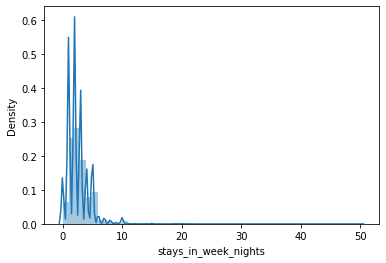

In [41]:
sn.distplot(df['stays_in_week_nights'])

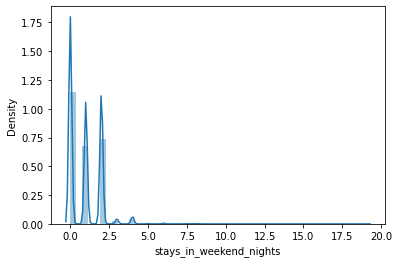

In [42]:
sn.distplot(df['stays_in_weekend_nights'])

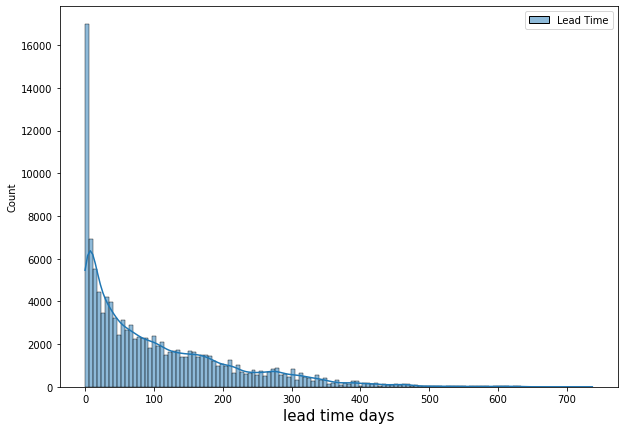

In [43]:
# cansaltion of hotel booking based on lead time
plt.figure(figsize=(10,7))
lead_time = pd.DataFrame(sorted(df['lead_time'], reverse = True), columns = ['Lead Time'])
sn.histplot(lead_time, kde=True)
plt.xlabel("lead time days", size=15)
plt.show()

[Text(0.5, 1.0, 'Total passengers of both hotels per year based on the cancellation status')]

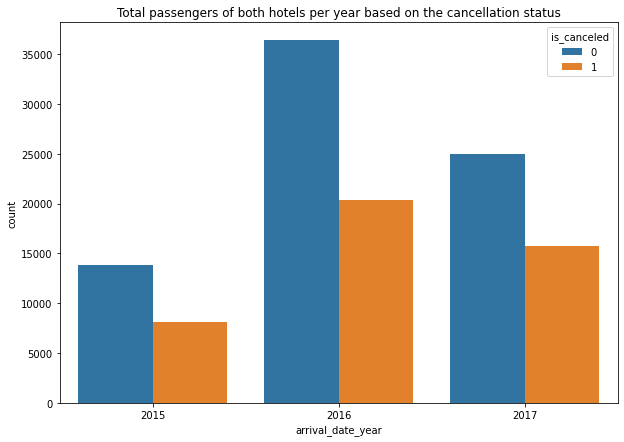

In [44]:
# Number of hotel booking canceled based on year wise
plt.figure(figsize=(10,7))
canellation = sn.countplot(df['arrival_date_year'], hue = 'is_canceled', data = df)
canellation.set(title = "Total passengers of both hotels per year based on the cancellation status")

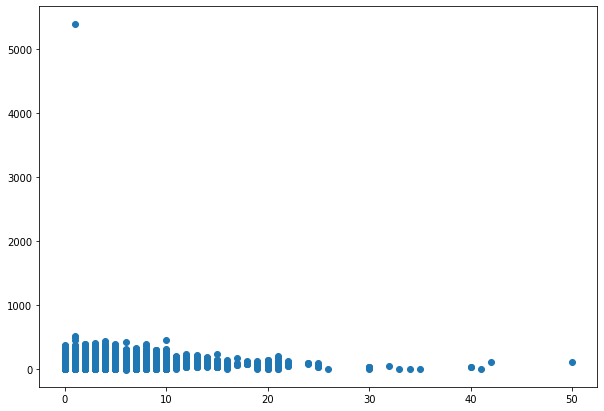

In [45]:
plt.figure(figsize=(10,7))
plt.scatter(df['stays_in_week_nights'], df['adr'])
plt.show()

[Text(0.5, 0, 'Reservation_status'),
 Text(0.5, 1.0, 'Guest with special requests')]

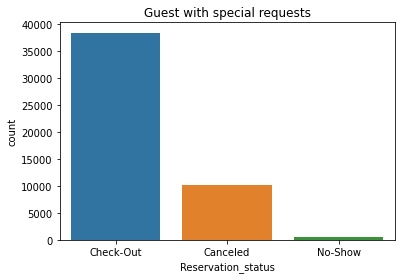

In [46]:
#Number of Cancellations based on with special requests
special_req = df[df.total_of_special_requests != 0].copy()
spec = sn.countplot(special_req.reservation_status, data=df)
spec.set(title = 'Guest with special requests', xlabel = 'Reservation_status')

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Reservation_status'),
 Text(0.5, 1.0, 'Guest without special requests')]

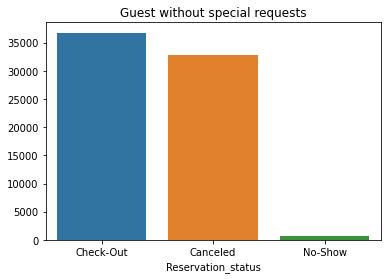

In [47]:
#Number of Cancellations based on with non special requests
non_special_req = df[df.total_of_special_requests == 0].copy()
n_spec = sn.countplot(non_special_req.reservation_status, data=df)
n_spec.set(title = 'Guest without special requests', ylabel = "", xlabel = 'Reservation_status')

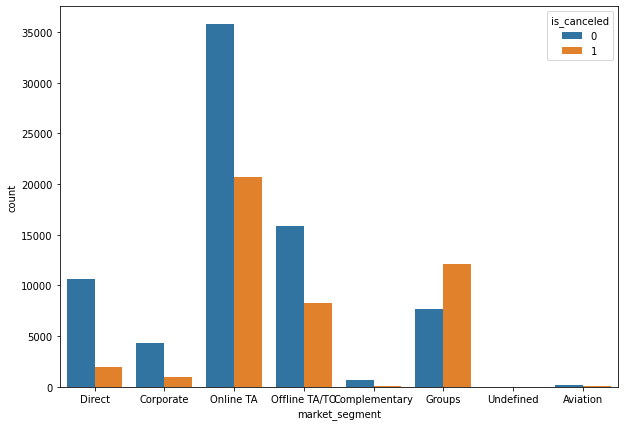

In [48]:
# number of booking canceled based on market_segment 
plt.figure(figsize=(10,7))
sn.countplot(x='market_segment', hue='is_canceled', data=df)

[Text(0.5, 1.0, 'Cancellation based on Meal Booked')]

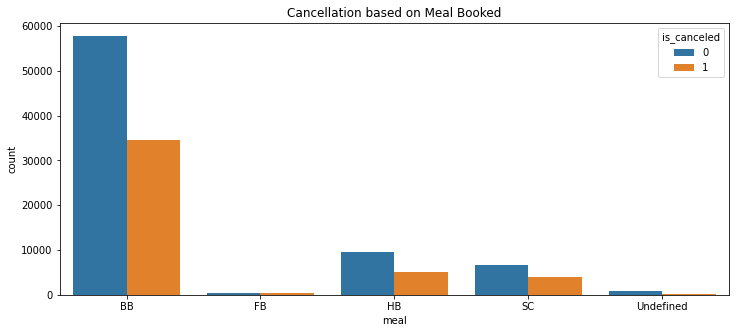

In [49]:
# 
plt.figure(figsize=(12,5))
meal_canceled = sn.countplot(df['meal'], hue = 'is_canceled', data = df);
meal_canceled.set(title = "Cancellation based on Meal Booked")

Text(0, 0.5, 'Count')

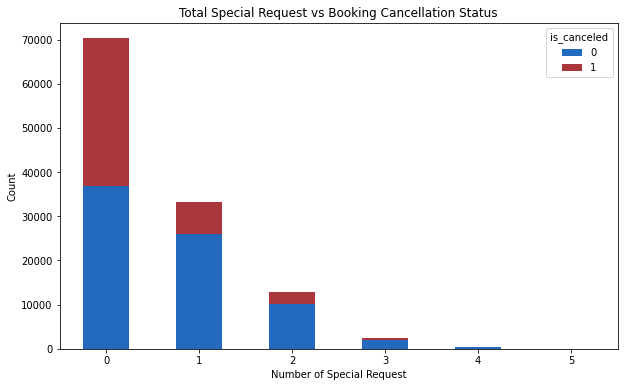

In [50]:
group_adr_request = df.groupby([ 'total_of_special_requests', 'is_canceled']).size().unstack(fill_value=0)
group_adr_request.plot(kind='bar', stacked=True, cmap='vlag', figsize=(10,6))
plt.title('Total Special Request vs Booking Cancellation Status')
plt.xlabel('Number of Special Request')
plt.xticks(rotation=360)
plt.ylabel('Count')

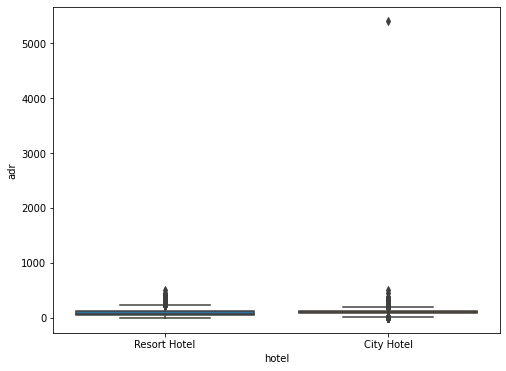

In [51]:
# relationship with categorical features
data = pd.concat([df['hotel'], df['adr']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sn.boxplot(x='hotel', y="adr", data=df)

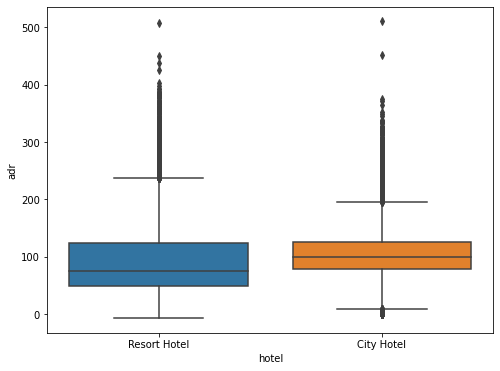

In [52]:
# droping the row with has adr greater than 3000
df.drop(df[df['adr']>=3000].index, inplace = True)
data = pd.concat([df['hotel'], df['adr']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sn.boxplot(x='hotel', y="adr", data=df)

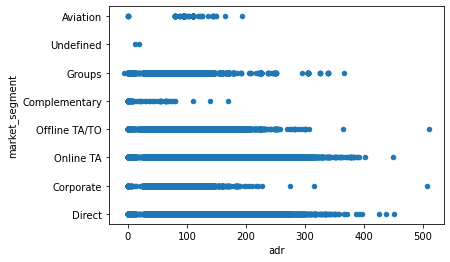

In [53]:
#relation with adr
data = pd.concat([df['market_segment'], df['adr']], axis=1)
data.plot.scatter(x="adr", y='market_segment');

In [ ]:
#correlation matrix
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293133,0.016662,0.008160,-0.006142,-0.001781,0.024773,0.060015,-0.032490,-0.084792,0.110135,-0.057357,-0.144396,0.054188,0.048708,-0.195496,-0.234652
lead_time,0.293133,1.000000,0.040141,0.126866,0.002273,0.085667,0.165796,0.119520,-0.020915,-0.124411,0.086041,-0.073549,0.000155,0.170084,-0.065603,-0.116452,-0.095716
arrival_date_year,0.016662,0.040141,1.000000,-0.540566,-0.000219,0.021496,0.030882,0.029636,-0.013192,0.010341,-0.119822,0.029218,0.030875,-0.056497,0.207560,-0.013685,0.108530
arrival_date_week_number,0.008160,0.126866,-0.540566,1.000000,0.066819,0.018200,0.015552,0.025911,0.010395,-0.030132,0.035500,-0.020904,0.005518,0.022932,0.080500,0.001918,0.026143
arrival_date_day_of_month,-0.006142,0.002273,-0.000219,0.066819,1.000000,-0.016346,-0.028167,-0.001568,-0.000230,-0.006143,-0.027010,-0.000299,0.010602,0.022729,0.030776,0.008686,0.003068
stays_in_weekend_nights,-0.001781,0.085667,0.021496,0.018200,-0.016346,1.000000,0.498966,0.091873,0.018482,-0.087241,-0.012775,-0.042716,0.063291,-0.054152,0.052639,-0.018556,0.072666
stays_in_week_nights,0.024773,0.165796,0.030882,0.015552,-0.028167,0.498966,1.000000,0.092977,0.020190,-0.097246,-0.013993,-0.048743,0.096218,-0.002021,0.069190,-0.024861,0.068187
adults,0.060015,0.119520,0.029636,0.025911,-0.001568,0.091873,0.092977,1.000000,0.018146,-0.146426,-0.006738,-0.107983,-0.051676,-0.008283,0.241824,0.014785,0.122885
babies,-0.032490,-0.020915,-0.013192,0.010395,-0.000230,0.018482,0.020190,0.018146,1.000000,-0.008943,-0.007501,-0.006551,0.083441,-0.010621,0.030705,0.037383,0.097889
is_repeated_guest,-0.084792,-0.124411,0.010341,-0.030132,-0.006143,-0.087241,-0.097246,-0.146426,-0.008943,1.000000,0.082293,0.418056,0.012094,-0.022235,-0.140792,0.077089,0.013049


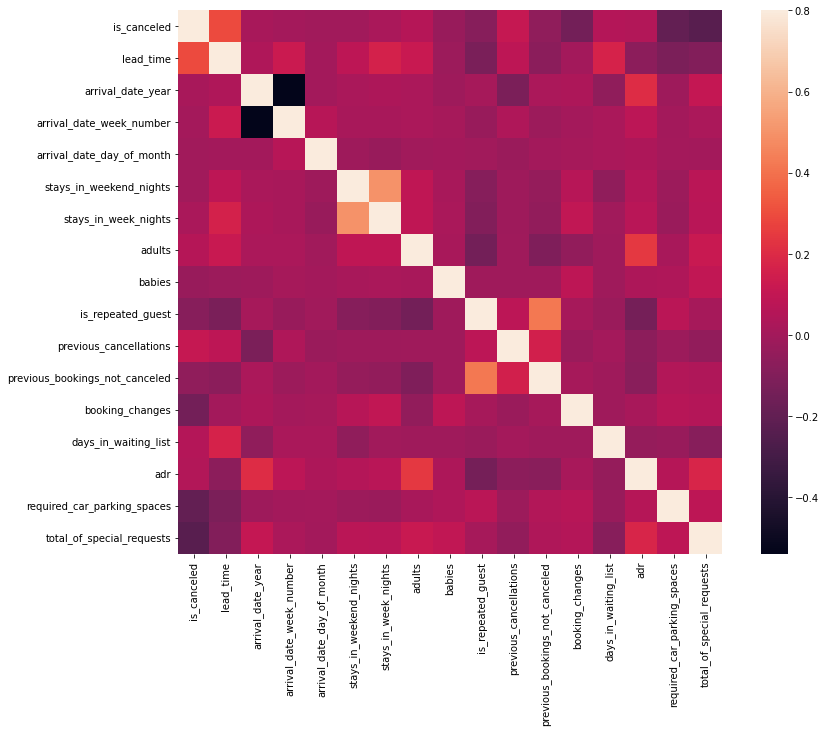

In [ ]:
#correlation matrix heatmap
corrmat = df.corr()
f, ax = plt.subplots(figsize=(14, 10))
sn.heatmap(corrmat, vmax=.8, square=True);

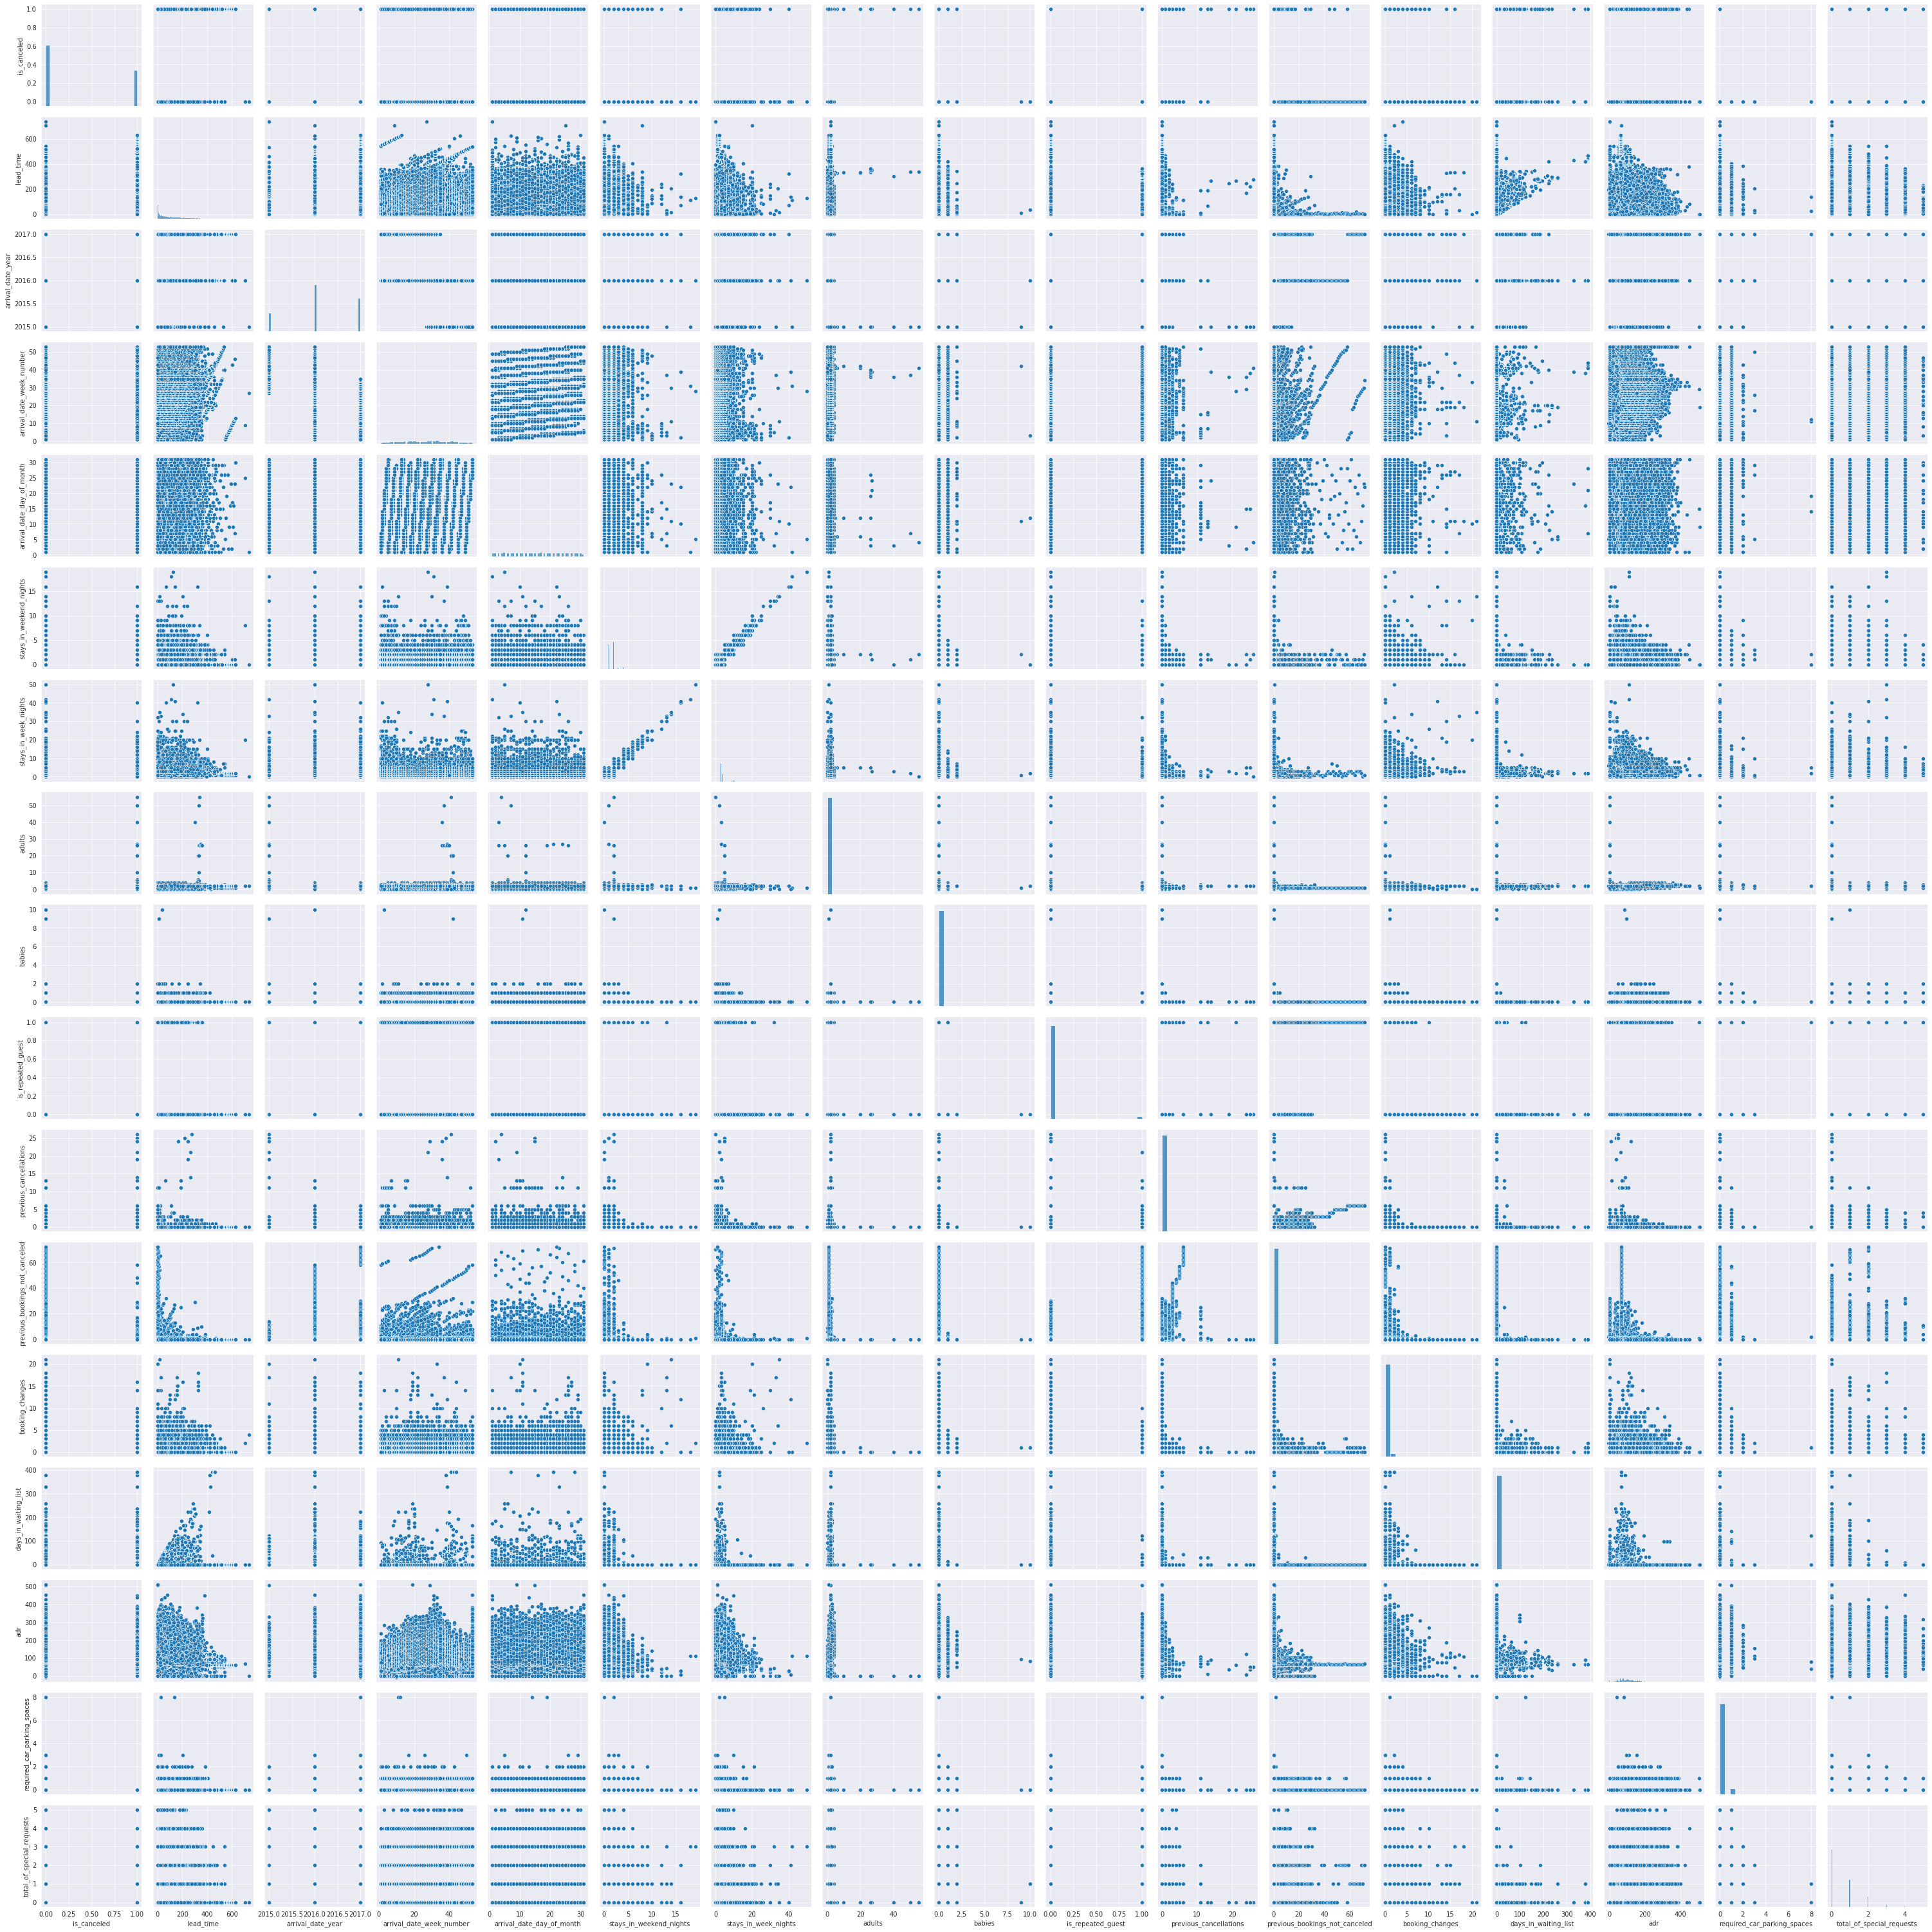

In [ ]:
# pairplot 
cols=df.columns
sn.set_style(style='darkgrid')
sn.pairplot(df[cols])

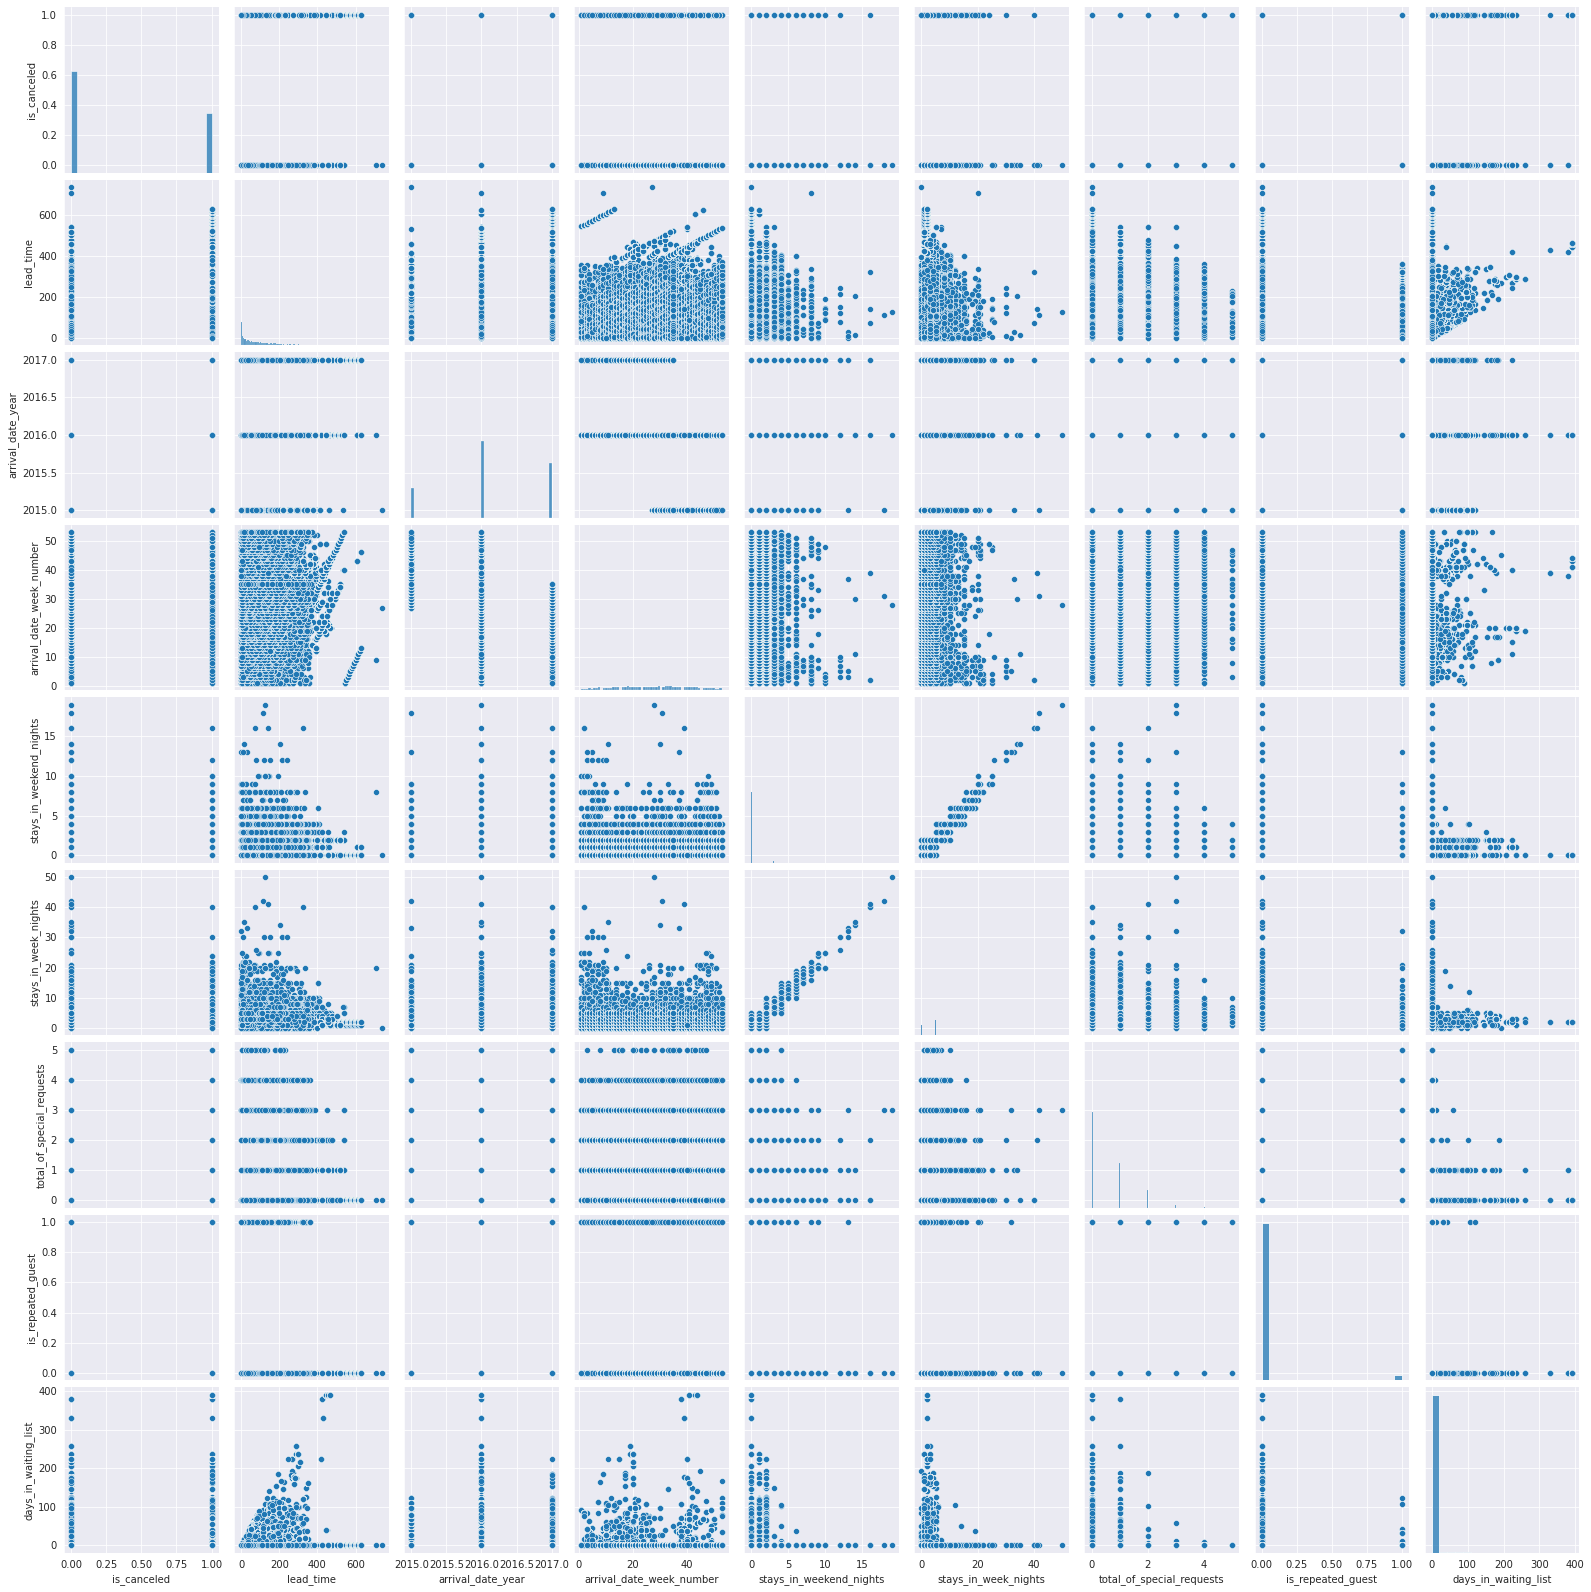

In [ ]:
colm=['is_canceled','lead_time','arrival_date_year','arrival_date_month','arrival_date_week_number','stays_in_weekend_nights','stays_in_week_nights',
      'country','meal','total_of_special_requests','is_repeated_guest','days_in_waiting_list','customer_type','assigned_room_type']
sn.set_style(style='darkgrid')
sn.pairplot(df[colm])

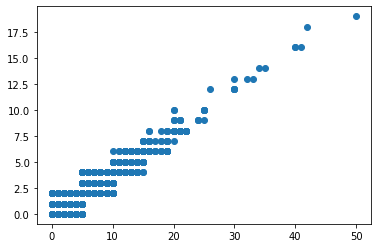

In [ ]:

plt.scatter(df['stays_in_week_nights'], df['stays_in_weekend_nights'])
plt.show()

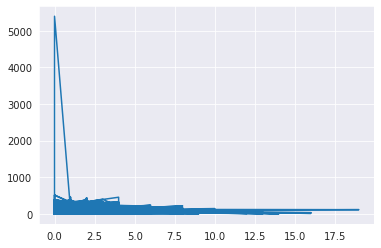

In [ ]:
#plt.figure(figsize=(10,7))
#plt.scatter(df['adr'], df['stays_in_weekend_nights'])
#plt.show()
plt.plot(df['stays_in_weekend_nights'],df['adr'])